In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/Housing.csv")
df.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [3]:
df.shape

(545, 13)

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# Simple regression

from sklearn.model_selection import train_test_split # type: ignore

x = df[["area"]]
y = df["price"]


In [9]:
# simple regression 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
train_data = x_train.join(y_train)
train_data


,area,price
440,3640,3234000
299,7000,4200000
461,4960,3080000
385,3640,3570000
494,6800,2730000
...,...,...
414,4040,3423000
111,8372,6090000
8,8100,9870000
23,4560,8645000


In [10]:
#simple regression

from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
#simple regression

y_predict = model.predict(x_test)
y_predict

array([ 3729608.27010082,  4971624.94094319,  5836165.95692171,
        4270250.82093809,  5483043.57011358,  4343310.62510529,
        3900081.14649095,  5380759.84427951,  4309216.04982726,
        7309538.67429354,  5385630.49789065,  3593229.96898872,
        5117744.54927759,  5142097.81733332,  3612712.5834333 ,
        5110438.56886087,  3904951.8001021 ,  4299474.74260497,
        5409983.76594638,  7638307.79304594,  3714996.30926738,
        5680305.04136502,  3576182.6813497 ,  3861115.91760178,
        3744220.23093426,  4289733.43538268,  5702222.98261518,
        5604809.91039225,  3255206.60837515,  5409983.76594638,
        3773444.15260114,  5293088.07927887,  5127485.85649988,
        4189885.03635417,  5507396.83816932,  3968270.297047  ,
        3466592.97509891,  4338439.97149414,  5936014.35595021,
        6345149.25928652,  4070554.02288108,  6213641.61178557,
        5848342.59094958,  5839575.41444951,  5117744.54927759,
        5117744.54927759,  4874211.86872

In [12]:
# simple regression 

mse = mean_squared_error(y_test , y_predict)
print("Mean Squared Error: ", mse)


Mean Squared Error:  3130628001588.9805


In [13]:
# simple regression

R2_score = r2_score(y_test , y_predict)
print("R2 Score: ", R2_score)


R2 Score:  0.23266694897991624


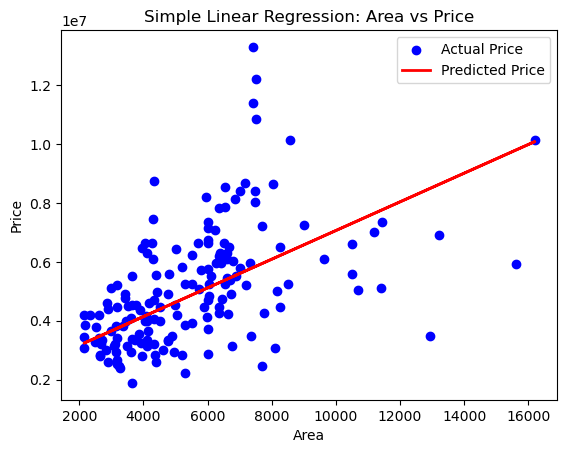

In [14]:
#simple regression

plt.scatter(x_test, y_test, color='blue', label='Actual Price')
plt.plot(x_test, y_predict, color='red', linewidth=2, label='Predicted Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

In [15]:
# multiple regression

x_multiple = df[['area', 'bedrooms', 'bathrooms']]
y = df["price"]


In [16]:
# multiple regression

x_train, x_test, y_train, y_test = train_test_split(x_multiple, y, test_size=0.3)
train_data = x_train.join(y_train)
train_data


,area,bedrooms,bathrooms,price
502,3480,2,1,2660000
178,7085,3,1,5229000
536,3420,5,1,1960000
207,3000,3,1,4900000
159,3150,3,2,5460000
...,...,...,...,...
511,3180,3,1,2520000
234,3880,3,2,4620000
170,5500,3,2,5250000
287,5500,3,1,4200000


In [17]:
# multiple regression

from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

model_multiple = LinearRegression()
model_multiple.fit(x_train,y_train)




LinearRegression()

In [18]:
y_pred_multiple = model_multiple.predict(x_test)
y_pred_multiple

array([ 6451860.24655719,  6779364.60472369,  3365347.60646072,
        3197835.23054504,  4248457.45532685,  4624434.9157352 ,
        3381452.12981424,  5260153.35481786,  2922409.88164125,
        3687480.2952629 ,  3732581.40499911,  3078992.68021948,
        5306217.11181646,  4329407.57872991,  6664893.88533311,
        3149745.09026025,  6223338.96090005,  3505246.19638011,
        3680119.43377934,  3452784.22516034,  5026643.36175344,
        3802530.69995881,  5915927.99506498,  3824389.85463371,
        5294707.84917368,  6134519.54181402,  5271465.89411236,
        4371288.87463034,  6424443.18390917,  4977170.42108224,
        8047775.26117346,  5024074.48432889,  3412054.9463591 ,
        4289186.73412809,  4682651.51827636,  3534466.21253857,
        4172387.59705818,  2883063.40322642,  6344367.4266931 ,
        4108558.86540747,  5493046.47140998,  4992088.86739762,
        6134519.54181402,  3078992.68021948,  3726826.77367772,
        7151353.19615412,  7339958.80283

In [19]:
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
print("Mean square error multiple : " ,mse_multiple)
print("R2 score multiple : " ,r2_multiple)

Mean square error multiple :  1815059007454.134
R2 score multiple :  0.3870128019381228
